In [1]:
# Dependencies
import numpy as np
import modules.string as string
import pandas as pd

In [4]:
# Constants
HUMAN_CSV_PATH = 'data/human.csv'  # Test set csv
GO_CSV_PATH = 'data/go/go.csv'  # GO terms dataset
STRING_GZ_PATH = 'data/string.txt.gz'  # String dataset
RESULT_PATH = 'data/results/ensemble.tsv'

In [3]:
# Load human proteome dataset
human_proteome = pd.read_csv(HUMAN_CSV_PATH, sep='\t')
# Format string id column
human_proteome.string_id = human_proteome.string_id.map(lambda x: str(x).replace(';', '').strip())
human_proteome.head()

,entry_ac,entry_name,protein_name,len,domains,go,pdb_ids,pfam_ids,string_id,cath_ids,PF00397
0,Q9Y263,PLAP_HUMAN,Phospholipase A-2-activating protein (PLA2P) (...,795,WD repeat PLAP family,cell [GO:0005623]; cell junction [GO:0030054];...,2K89;2K8A;2K8B;2K8C;3EBB;,PF09070;PF08324;PF00400;,9606.ENSP00000380460,1.10.150.410;1.25.10.10;2.130.10.10;,False
1,Q96RE7,NACC1_HUMAN,Nucleus accumbens-associated protein 1 (NAC-1)...,527,NaN,cell junction [GO:0030054]; cytoplasm [GO:0005...,3GA1;4U2N;,PF10523;PF00651;,9606.ENSP00000292431,NaN,False
2,O43312,MTSS1_HUMAN,Protein MTSS 1 (Metastasis suppressor YGL-1) (...,755,MTSS family,actin cytoskeleton [GO:0015629]; cytoplasm [GO...,2D1K;,PF08397;PF02205;,9606.ENSP00000322804,1.20.1270.60;,False
3,Q9NP80,PLPL8_HUMAN,Calcium-independent phospholipase A2-gamma (EC...,782,NaN,endoplasmic reticulum membrane [GO:0005789]; G...,NaN,PF01734;,9606.ENSP00000410804,NaN,False
4,Q15319,PO4F3_HUMAN,"POU domain, class 4, transcription factor 3 (B...",338,"POU transcription factor family, Class-4 subfa...",cytoplasm [GO:0005737]; nuclear chromatin [GO:...,NaN,PF00046;PF00157;,9606.ENSP00000230732,1.10.260.40;,False


In [59]:
# Define a fake original dataset
original = pd.read_csv(RESULT_PATH, sep='\t')
original.head()

,entry_ac,entry_name,protein_name,len,domains,go,pdb_ids,pfam_ids,string_id,cath_ids,PF00397
0,Q9BTA9,WAC_HUMAN,WW domain-containing adapter protein with coil...,647,NaN,nuclear speck [GO:0016607]; nucleoplasm [GO:00...,NaN,PF00397;,9606.ENSP00000346986;,NaN,True
1,Q9NZC7,WWOX_HUMAN,WW domain-containing oxidoreductase (EC 1.1.1....,414,Short-chain dehydrogenases/reductases (SDR) fa...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,1WMV;,PF00106;PF00397;,9606.ENSP00000457230;,NaN,True
2,Q9GZV5,WWTR1_HUMAN,WW domain-containing transcription regulator p...,400,NaN,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,5N5R;5N5T;5N5W;5N75;,PF00397;,9606.ENSP00000419465;,NaN,True
3,Q8N3X1,FNBP4_HUMAN,Formin-binding protein 4 (Formin-binding prote...,1017,NaN,nuclear speck [GO:0016607],NaN,PF00397;,9606.ENSP00000263773;,NaN,True
4,O15428,PINL_HUMAN,Putative PIN1-like protein (Peptidylprolyl cis...,100,NaN,cytosol [GO:0005829]; nucleus [GO:0005634]; pe...,NaN,PF00397;,NaN,NaN,True


In [60]:
# Load gene ontology dataset
gene_ontology = pd.read_csv(GO_CSV_PATH, sep='\t', dtype={
    'entry_ac': np.unicode_,
    'go_id': np.unicode_,
    'go_descr': np.unicode_
})
gene_ontology.head()

,entry_ac,go_id,go_descr
0,Q9Y263,0005623,cell
1,Q9Y263,0030054,cell junction
2,Q9Y263,0005737,cytoplasm
3,Q9Y263,0070062,extracellular exosome
4,Q9Y263,0005634,nucleus


In [61]:
# Load interactions in human proteome
interactions = string.load(STRING_GZ_PATH)
protein_number = len(set(interactions.protein1.values))
print('Number of proteins: {}'.format(protein_number))
print('Mean number of interactions: {}'.format(interactions.shape[0]/protein_number))
interactions.head()

Number of proteins: 19354
Mean number of interactions: 607.5981192518342


,protein1,protein2,combined_score
0,9606.ENSP00000000233,9606.ENSP00000272298,490
1,9606.ENSP00000000233,9606.ENSP00000253401,198
2,9606.ENSP00000000233,9606.ENSP00000401445,159
3,9606.ENSP00000000233,9606.ENSP00000418915,606
4,9606.ENSP00000000233,9606.ENSP00000327801,167


In [37]:
# Define set of ids in original proteome (must be kept)
original_string_ids = set([i[:-1] for i in original.string_id.tolist() if type(i) == str])

# Get direct interactors
direct_interactors = interactions.protein2[interactions.protein1.isin(original_string_ids)]
print(len(direct_interactors))
direct_interactors.head()

46411


359351    9606.ENSP00000226193
359352    9606.ENSP00000294312
359353    9606.ENSP00000300619
359354    9606.ENSP00000377969
359355    9606.ENSP00000334008
Name: protein2, dtype: object

In [58]:
# Define set of ids in original proteome (must be kept)
original_string_ids = set([i[:-1] for i in original.string_id.tolist() if type(i) == str])
original_interaction

,protein1,protein2,combined_score


In [62]:
# Define set of ids in original proteome (must be kept)
original_string_ids = set([i[:-1] for i in original.string_id.tolist() if type(i) == str])
# Get direct interactors
original_interaction = interactions[interactions.protein1.isin(original_string_ids)]
# Filter by score
original_interaction = original_interaction[original_interaction.combined_score > 700]
# Display
number_original_proteins = len(set(original_interaction.protein1.values))
number_of_interactors = len(set(original_interaction.protein2.values))
print('Number of protein 1: {}'.format(number_original_proteins))
print('Number of protein 2: {}'.format(number_of_interactors))
print('Mean number of interarctions: {}'.format(original_interaction.shape[0]/number_original_proteins))
original_interaction.head()

Number of protein 1: 44
Number of protein 2: 1483
Mean number of interarctions: 91.88636363636364


,protein1,protein2,combined_score
359354,9606.ENSP00000218224,9606.ENSP00000377969,908
359356,9606.ENSP00000218224,9606.ENSP00000356541,904
359365,9606.ENSP00000218224,9606.ENSP00000434359,907
359369,9606.ENSP00000218224,9606.ENSP00000225792,903
359370,9606.ENSP00000218224,9606.ENSP00000325376,951


In [64]:
# Define interactors ids
interactors_string_ids = set(original_interaction.protein2.tolist())
# Define union of the two sets
all_string_ids = original_string_ids | interactors_string_ids

# Get all proteins in original dataset, plus direct interactors
original = human_proteome[human_proteome.string_id.isin(all_string_ids)]
print('Number of orginal proteins: {}'.format(original.shape[0]))
original.head()

Number of orginal proteins: 1477


,entry_ac,entry_name,protein_name,len,domains,go,pdb_ids,pfam_ids,string_id,cath_ids,PF00397
5,P08134,RHOC_HUMAN,Rho-related GTP-binding protein RhoC (Rho cDNA...,193,"Small GTPase superfamily, Rho family",cell cortex [GO:0005938]; cell division site [...,1Z2C;2GCN;2GCO;2GCP;,PF00071;,9606.ENSP00000285735,NaN,False
11,P51149,RAB7A_HUMAN,Ras-related protein Rab-7a,207,"Small GTPase superfamily, Rab family",autophagosome membrane [GO:0000421]; cell [GO:...,1T91;1YHN;3LAW;6IYB;,PF00071;,9606.ENSP00000265062,NaN,False
20,Q9GZS3,WDR61_HUMAN,WD repeat-containing protein 61 (Meiotic recom...,305,NaN,Cdc73/Paf1 complex [GO:0016593]; cytoplasm [GO...,3OW8;6GMH;,PF00400;,9606.ENSP00000267973,2.130.10.10;,False
64,O15273,TELT_HUMAN,Telethonin (Titin cap protein),167,NaN,cytosol [GO:0005829]; I band [GO:0031674]; Z d...,1YA5;2F8V;,PF09470;,9606.ENSP00000312624,2.20.160.10;,False
80,P11441,UBL4A_HUMAN,Ubiquitin-like protein 4A (Ubiquitin-like prot...,157,NaN,BAT3 complex [GO:0071818]; cytoplasm [GO:00057...,2DZI;4WWR;4X86;,PF17840;PF00240;,9606.ENSP00000358674,NaN,False


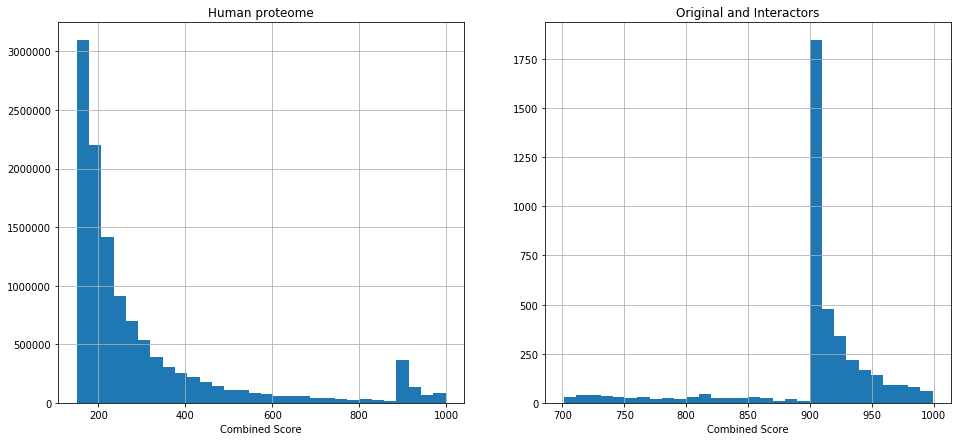

In [65]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].hist(interactions.combined_score, bins = 30)
ax[0].set_xlabel('Combined Score')
ax[0].set_title('Human proteome')
ax[0].grid()
ax[1].hist(original_interaction.combined_score, bins=30)
ax[1].set_xlabel('Combined Score')
ax[1].set_title('Original and Interactors')
ax[1].grid()
plt.show()

In [72]:
eg = original_interaction[original_interaction.protein1 == original.string_id[original.entry_ac == 'Q9BTA9'].values[0]]
eg.sort_values(by='combined_score').tail()

,protein1,protein2,combined_score
5772742,9606.ENSP00000346986,9606.ENSP00000267973,921
5772989,9606.ENSP00000346986,9606.ENSP00000355013,922
5772948,9606.ENSP00000346986,9606.ENSP00000360613,933
5772652,9606.ENSP00000346986,9606.ENSP00000373772,975
5772790,9606.ENSP00000346986,9606.ENSP00000325677,975
